### importing libraries

In [24]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

### Step 1: Grayscaling

#### process: 
1. **Kernel Selection**
2. **Convolution Operation** 
#### purpose
 - **friendly to operate**
 - **values 0~255**
 

In [25]:
def rgb_to_grayscale(image_array):
    luminance = np.dot(image_array[..., :3], [0.299, 0.587, 0.114])
    grayscale_array = luminance.astype(np.uint8)
    return grayscale_array

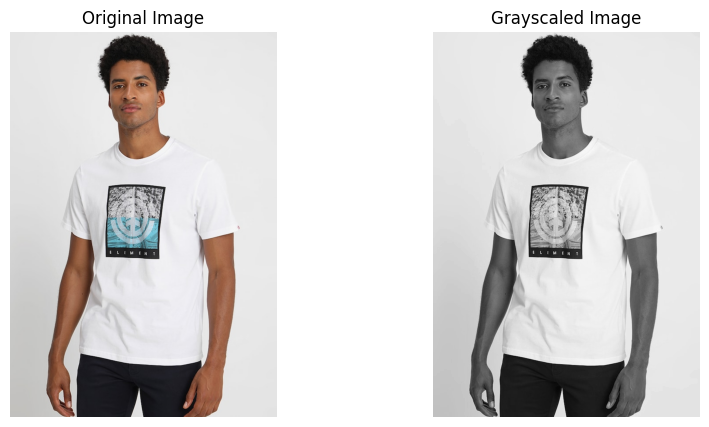

In [26]:
image = cv2.imread('m3.jpg')
gray_image = rgb_to_grayscale(image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscaled Image')
plt.axis('off')

plt.show()

### Step 2: Gaussian Blur


#### process: 
1. **Kernel Selection**
2. **Convolution Operation** 
#### purpose
 - **Noise Reduction**
 - **Smoothing**

In [27]:
def apply_gaussian_blur(image):
    # Define the Gaussian blur kernel
    kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

    # Apply convolution using NumPy's convolve function
    blurred_image = np.zeros_like(image, dtype=float)
    blurred_image = np.convolve(
        image.flatten(), kernel.flatten(), mode='same').reshape(image.shape)

    return blurred_image.astype(np.uint8)

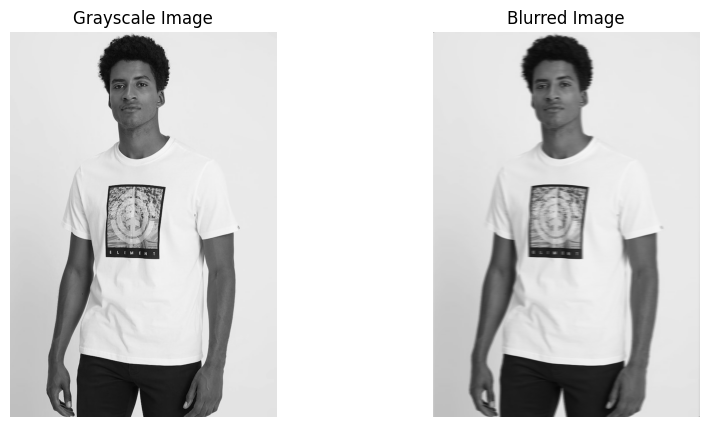

In [28]:
blurred_image = apply_gaussian_blur(gray_image)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')

plt.show()

**define gaussian kernel**

In [29]:
def gaussian_kernel(kernel_size, sigma):
    kernel_range = np.arange(-(kernel_size // 2), kernel_size // 2 + 1)
    kernel = np.exp(-0.5 * (kernel_range ** 2) / sigma ** 2)
    kernel = kernel / np.sum(kernel)
    return kernel

In [30]:
kernel_size = 5
sigma = 0.3 * ((kernel_size - 1) * 0.5 - 1) + 0.8
kernel = gaussian_kernel(kernel_size, sigma)
gaussian_mask = np.outer(kernel, kernel.transpose())

In [31]:
blurred_single_channel = convolve2d(
            gray_image, gaussian_mask, mode='same', boundary='wrap')
blurred = blurred_single_channel.astype(np.uint8)

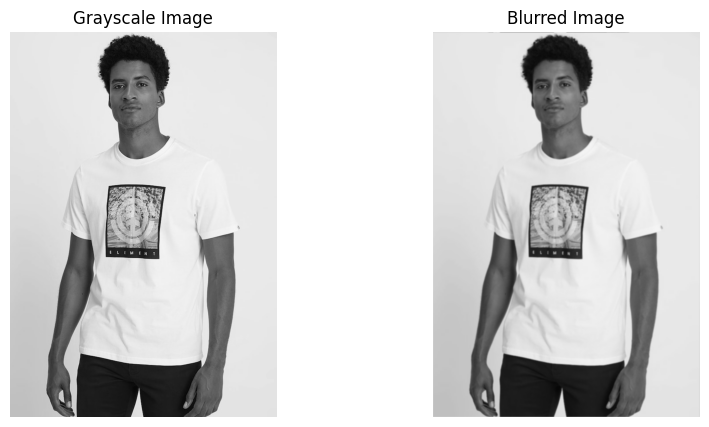

In [32]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')

plt.show()

### Sobel x

- **borders along x**

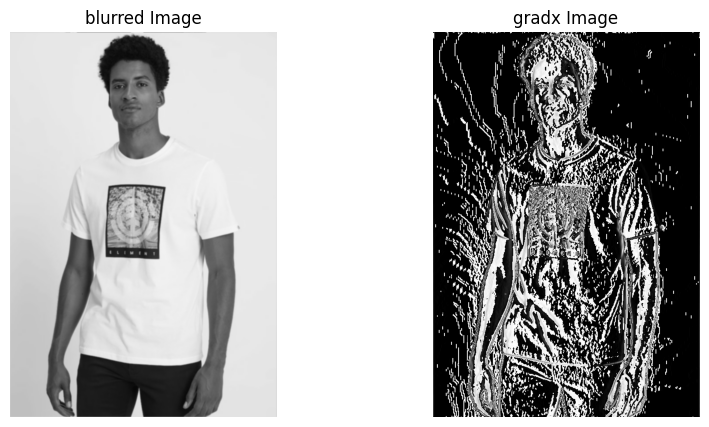

In [33]:
def sobelx(image):
    # Sobel X operator
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    # Apply convolution using NumPy's convolve function
    gradient_x = convolve2d(image, kernel_x, mode='same', boundary='wrap')

    sobel_x_image = np.zeros_like(image)
    sobel_x_image = np.convolve(
        image.flatten(), kernel_x.flatten(), mode='same').reshape(image.shape)

    return gradient_x.astype(np.uint8), sobel_x_image.astype(np.uint8)

gradx1,gradx2 = sobelx(blurred)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title('blurred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gradx1, cv2.COLOR_BGR2RGB))
plt.title('gradx Image')
plt.axis('off')

plt.show()

### Sobel y

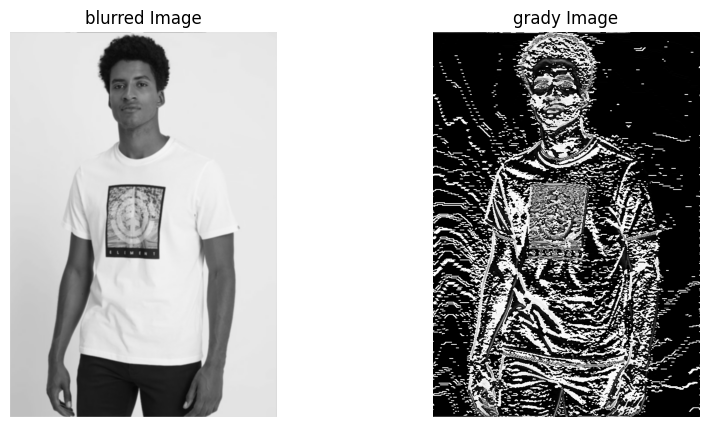

In [34]:
def sobely(image):
    # Sobel Y operator
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    # Apply convolution using NumPy's convolve function
    gradient_y = convolve2d(image, kernel_y, mode='same', boundary='wrap')


    return gradient_y.astype(np.uint8)

grady = sobely(blurred)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title('blurred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(grady, cv2.COLOR_BGR2RGB))
plt.title('grady Image')
plt.axis('off')

plt.show()

### Sobel operator

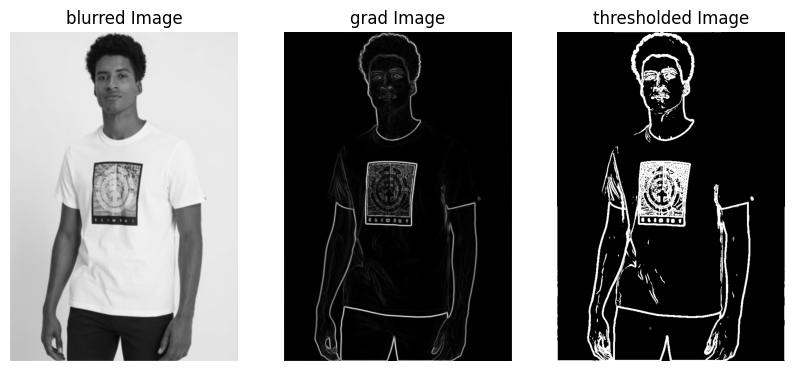

In [35]:
def sobel_filter(image):
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    gradient_x = convolve2d(image, kernel_x, mode='same', boundary='wrap')
    gradient_y = convolve2d(image, kernel_y, mode='same', boundary='wrap')

    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    return gradient_magnitude, gradient_direction

grad_mag,grad_ang= sobel_filter(blurred)

threshold = 40
gradient_new = (grad_mag > threshold).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title('blurred Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(grad_mag, cmap='gray')
plt.title('grad Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gradient_new, cmap='gray')
plt.title('thresholded Image')
plt.axis('off')

plt.show()

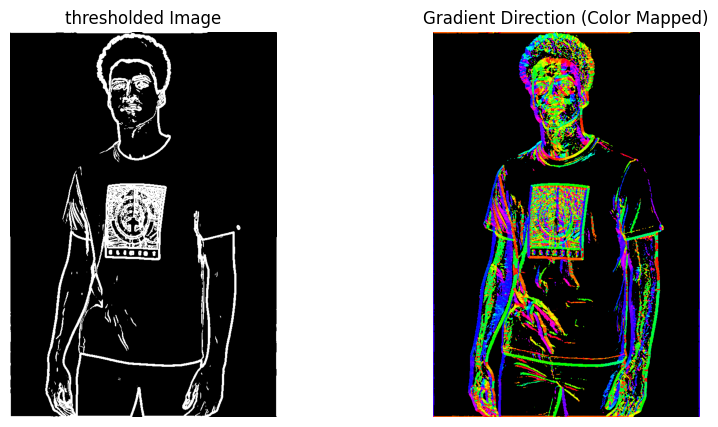

In [36]:
threshold = 10
border_mask = (grad_mag > threshold).astype(np.uint8)


hue = (grad_ang + np.pi) / (2 * np.pi)
hue[hue > 1] -= 1
hue_scaled = np.uint8(hue * 255)
hsv_image = np.zeros((grad_mag.shape[0], grad_mag.shape[1], 3), dtype=np.uint8)
hsv_image[..., 0] = hue_scaled
hsv_image[..., 1] = 255
hsv_image[..., 2] = 255 * border_mask
rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gradient_new, cmap='gray')
plt.title('thresholded Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rgb_image)
plt.title('Gradient Direction (Color Mapped)')
plt.axis('off')

plt.show()

### Thresholded suppression

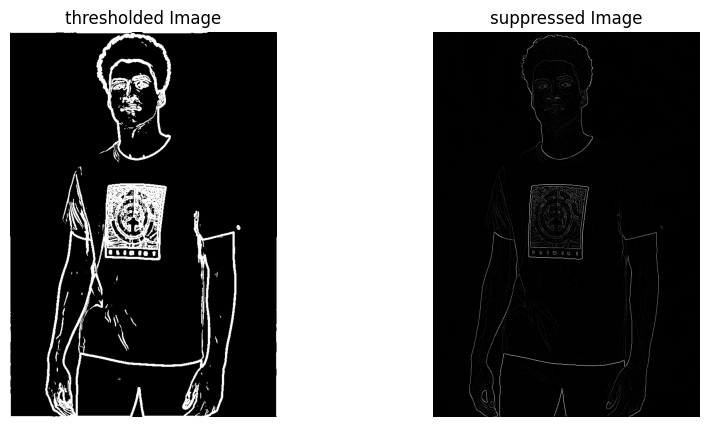

In [37]:
def non_maximum_suppression(magnitude, direction):
    angle = np.degrees(direction) % 180
    suppressed = np.zeros_like(magnitude)

    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            if (0 <= angle[i, j] < 22) or (158 <= angle[i, j] <= 180):
                neighbor_pixels = [magnitude[i, j+1], magnitude[i, j-1]]
            elif 22 <= angle[i, j] < 67:
                neighbor_pixels = [magnitude[i+1, j-1], magnitude[i-1, j+1]]
            elif 67 <= angle[i, j] < 112:
                neighbor_pixels = [magnitude[i+1, j], magnitude[i-1, j]]
            else:
                neighbor_pixels = [magnitude[i+1, j+1], magnitude[i-1, j-1]]

            if magnitude[i, j] >= max(neighbor_pixels):
                suppressed[i, j] = magnitude[i, j]

    return suppressed

magnitude_suppressed = non_maximum_suppression(grad_mag, grad_ang)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gradient_new, cmap='gray')
plt.title('thresholded Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_suppressed, cmap='gray')
plt.title('suppressed Image')
plt.axis('off')

plt.show()

### Connecting edges

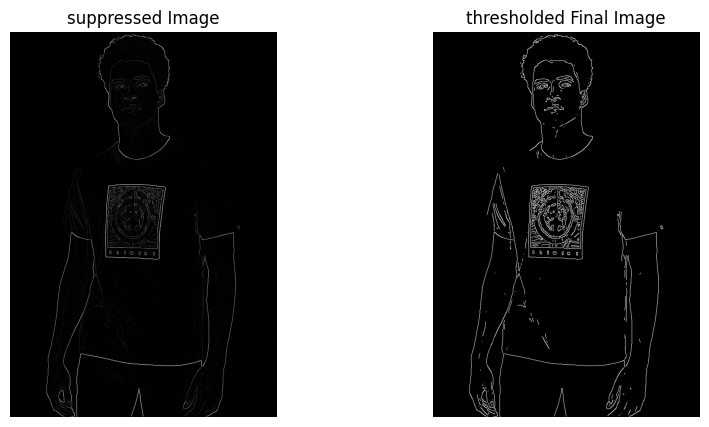

In [38]:
def hysteresis_thresholding(image, low_threshold_ratio=0, high_threshold_ratio=0.1):
    high_threshold = np.max(image) * high_threshold_ratio
    low_threshold = high_threshold * low_threshold_ratio

    strong_edges_row, strong_edges_col = np.where(image >= high_threshold)
    weak_edges_row, weak_edges_col = np.where(
        (image >= low_threshold) & (image < high_threshold))

    output_image = np.zeros_like(image, dtype=np.uint8)
    output_image[strong_edges_row, strong_edges_col] = 255
    output_image[weak_edges_row, weak_edges_col] = 20  # Weak edges
    return output_image


edges = hysteresis_thresholding(magnitude_suppressed)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(magnitude_suppressed, cmap='gray')
plt.title('suppressed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('thresholded Final Image')
plt.axis('off')

plt.show()

### enhancing


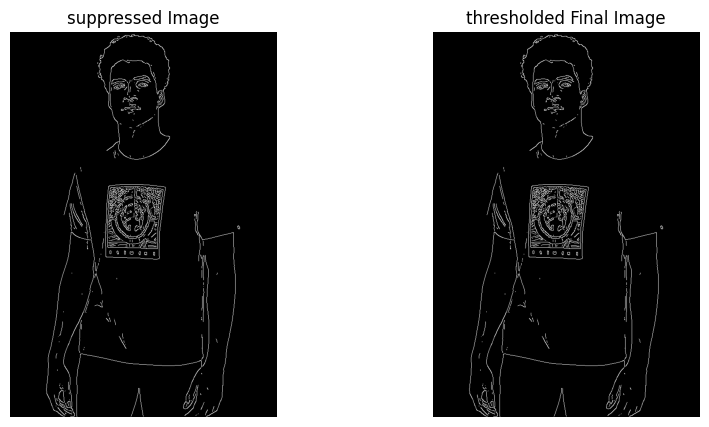

In [39]:
def adjust_pixel_values(image):
    # Thresholding to adjust pixel values
    adjusted_img = np.where(image < 50, 0, np.where(image > 200, 255, image))

    return adjusted_img


enhanced = adjust_pixel_values(edges)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('suppressed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced, cmap='gray')
plt.title('thresholded Final Image')
plt.axis('off')

plt.show()

### Border cutting

In [40]:
def extract_bordered_portion(image, edges, gray):
    if image is None or edges is None or gray is None:
        print("Invalid input. One or more input images are None.")
        return None

    # Find contours
    contours, _ = cv2.findContours(
        edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print("No contours found.")
        return None

    # Initialize a list to store the areas of the contours
    contour_areas = [cv2.contourArea(contour) for contour in contours]

    # Find the index of the contour with the largest area
    largest_contour_index = contour_areas.index(max(contour_areas))

    # Get the contour with the largest area
    largest_contour = contours[largest_contour_index]

    # Get the minimum enclosing rectangle around the contour
    rect = cv2.minAreaRect(largest_contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # Crop the original image using the minimum enclosing rectangle
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [box], 0, (255), -1)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    (x, y, w, h) = cv2.boundingRect(box)
    bordered_portion = masked_image[y:y+h, x:x+w]

    return bordered_portion

### Creating dataset for next part


In [41]:
def extract_bordered_portion(image, edges, gray):
    height, width = edges.shape[:2]
    top, bottom, left, right = height, 0, width, 0

    # Iterate over the top border
    for y in range(height):
        if edges[y, :].any():  # Check if any edge pixel is present in the row
            top = y
            break

    # Iterate over the bottom border
    for y in range(height - 1, -1, -1):
        if edges[y, :].any():
            bottom = y
            break

    # Iterate over the left border
    for x in range(width):
        if edges[:, x].any():  # Check if any edge pixel is present in the column
            left = x
            break

    # Iterate over the right border
    for x in range(width - 1, -1, -1):
        if edges[:, x].any():
            right = x
            break

    # Cut the bordered portion using the detected borders
    bordered_portion = image[top:bottom+1, left:right+1]

    return bordered_portion



input_folder = "train_border"
output_folder = "outputs"

os.makedirs(output_folder, exist_ok=True)
for file_name in os.listdir(input_folder):
    if file_name.endswith(".jpg"):
        # Read the image
        image_path = os.path.join(input_folder, file_name)
        image = cv2.imread(image_path)

        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply Canny edge detection
        edges = cv2.Canny(gray, 30, 190)

        # Save the bordered portion
        bordered_portion = extract_bordered_portion(image, edges, gray)
        if bordered_portion is not None and bordered_portion.size > 0:
            output_path = os.path.join(output_folder, file_name)
            cv2.imwrite(output_path, bordered_portion)
            print(f"Saved bordered portion of {file_name}.")

print("Edge detection completed and bordered portions saved.")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'train_border'